In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
files = [
    "lr_0.0001_adam_bs1024.txt", "lr_0.001_adam_bs1024.txt", "lr_0.005_adam_bs1024.txt", 'lr_0.006_adam_bs1024.txt', 
    'lr_0.007_adam_bs1024.txt', 'lr_0.008_adam_bs1024.txt', 'lr_0.009_adam_bs1024.txt', "lr_0.01_adam_bs1024.txt", 
    'adadelta_bs1024.txt']

# We can exclude 0.05 and 0.5... "lr_0.05_adam_bs1024.txt", "lr_0.5_adam_bs1024.txt", 

ACC = "Accuracy: "
TIME = ": time="
ENERGY = ", energy="
THRESHOLD = 0.6

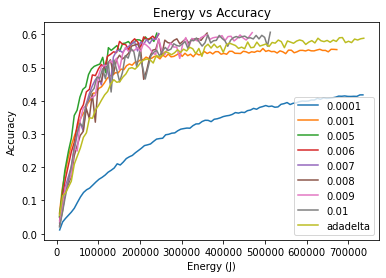

In [21]:
energy_time_06 = []
# recorded = set()
accuracies = {}
times = {}
energy_consumption = {}
for file in files:
    acc = []
    time = []
    energy_cons = []
    with open(file) as f:
        line = f.readline()
        accuracy = 0
        while line:
            if "Validation Epoch:" in line:
                accuracy = float(line[line.index(ACC) + len(ACC): line.index("\n")])
                acc.append(accuracy)
            elif "Up to epoch" in line:
                if "epoch 0" not in line:
                    t = float(line[line.index(TIME) + len(TIME): line.index(ENERGY)])
                    energy = float(line[line.index(", energy=") + len(", energy="): line.index(", cost=")])
                    time.append(t)
                    energy_cons.append(energy)
#                 if accuracy >= THRESHOLD and file not in recorded:
#                     energy_time_06.append((energy, time, file))
#                     recorded.add(file)
            line = f.readline()
    accuracies[file] = acc
    times[file] = time
    energy_consumption[file] = energy_cons
    lr = file.split('_')[1] if 'adam' in file else 'adadelta'
    plt.plot(energy_cons, acc, label=lr)

plt.xlabel("Energy (J)")
plt.ylabel("Accuracy")
plt.title("Energy vs Accuracy")
plt.legend(loc='best')
plt.show()

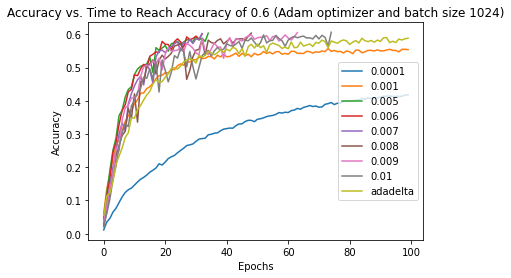

In [22]:
for file in files:
    accuracy = accuracies[file]
    epochs = range(len(accuracy))
    lr = file.split('_')[1] if 'adam' in file else 'adadelta'
    plt.plot(epochs, accuracy, label=lr)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Time to Reach Accuracy of 0.6 (Adam optimizer and batch size 1024)')
plt.legend(loc='right')
plt.show()

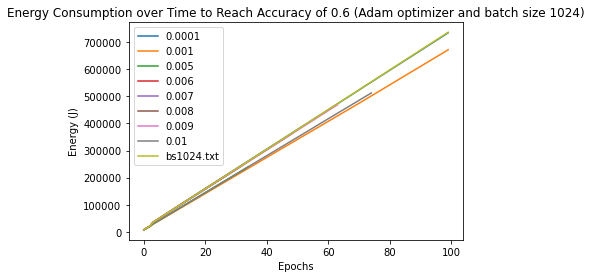

In [23]:
for file in files:
    energy = energy_consumption[file]
#     print(f'{file}: {len(energy)}')
    epochs = range(len(energy))
    lr = file.split('_')[1]
    plt.plot(epochs, energy, label=lr)
plt.xlabel('Epochs')
plt.ylabel('Energy (J)')
plt.title('Energy Consumption over Time to Reach Accuracy of 0.6 (Adam optimizer and batch size 1024)')
plt.legend()
plt.show()

In [24]:
from analyze import HistoryEntry

In [25]:
history = eval(open('history.py').read())

In [26]:
adadelta_history = eval(open('history_adadelta.py').read())

In [27]:
history

[HistoryEntry(bs=1024, pl=None, lr=0.0001, energy=735181.4526552451, reached=False, time=4928.229457993996),
 HistoryEntry(bs=1024, pl=None, lr=0.001, energy=672462.2731224052, reached=False, time=4806.314337210996),
 HistoryEntry(bs=1024, pl=175.0, lr=0.005, energy=240343.41170650077, reached=True, time=1745.0100623509989),
 HistoryEntry(bs=1024, pl=175.0, lr=0.01, energy=512864.726165234, reached=True, time=3675.9740900210018),
 HistoryEntry(bs=1024, pl=150.0, lr=0.05, energy=673308.1082976655, reached=False, time=4862.071877154984),
 HistoryEntry(bs=1024, pl=150.0, lr=0.5, energy=630375.3421898179, reached=False, time=4775.313635210998),
 HistoryEntry(bs=1024, pl=175.0, lr=0.006, energy=245090.3820494143, reached=True, time=1682.810654917026),
 HistoryEntry(bs=1024, pl=175.0, lr=0.007, energy=244904.68639563024, reached=True, time=1681.7110675940203),
 HistoryEntry(bs=1024, pl=175.0, lr=0.008, energy=361245.8512208044, reached=True, time=2453.759384225974),
 HistoryEntry(bs=1024, pl

In [28]:
def convert_HistoryEntry_to_dict(h_entry):
    dict = {
        'batch_size': h_entry.bs,
        'learning_rate': h_entry.lr,
        'power_limit': h_entry.pl, 
        'energy': h_entry.energy, 
        'time': h_entry.time, 
        'reached': h_entry.reached
    }
    return dict

In [29]:
history_list = [convert_HistoryEntry_to_dict(he) for he in history]
history_df = pd.DataFrame(history_list)
history_df

,batch_size,learning_rate,power_limit,energy,time,reached
0,1024,0.0001,NaN,7.351815e+05,4928.229458,False
1,1024,0.0010,NaN,6.724623e+05,4806.314337,False
2,1024,0.0050,175.0,2.403434e+05,1745.010062,True
3,1024,0.0100,175.0,5.128647e+05,3675.974090,True
4,1024,0.0500,150.0,6.733081e+05,4862.071877,False
5,1024,0.5000,150.0,6.303753e+05,4775.313635,False
6,1024,0.0060,175.0,2.450904e+05,1682.810655,True
7,1024,0.0070,175.0,2.449047e+05,1681.711068,True
8,1024,0.0080,175.0,3.612459e+05,2453.759384,True
9,1024,0.0090,175.0,4.694277e+05,3171.897549,True


In [30]:
adadelta_hist = pd.DataFrame([convert_HistoryEntry_to_dict(he) for he in adadelta_history])

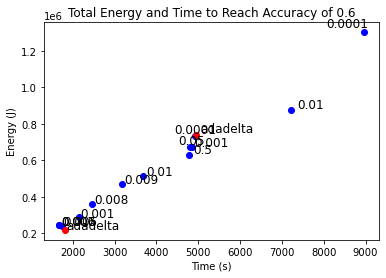

In [31]:
# plt.scatter(history_df['time'], history_df['energy'])
# https://stackoverflow.com/questions/44998205/labeling-points-in-matplotlib-scatterplot 
for row in history_df.iterrows():
    time = row[1]['time']
    energy = row[1]['energy']
    lr = row[1]['learning_rate']
    plt.plot(time, energy, 'bo')
    if lr != 0.05 and lr != 0.0001:
        plt.text(time * 1.02, energy * 1.01, lr, fontsize=12)
    elif lr == 0.0001:
        plt.text(time * 0.9, energy * 1.02, lr, fontsize=12)
    else:
        plt.text(time * 0.93, energy * 1.02, lr, fontsize=12)

for row in adadelta_hist.iterrows():
    time = row[1]['time']
    energy = row[1]['energy']
    plt.plot(time, energy, 'ro')
    plt.text(time * 1.02, energy * 1.02, 'adadelta', fontsize=12)

plt.title('Total Energy and Time to Reach Accuracy of 0.6')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.show()

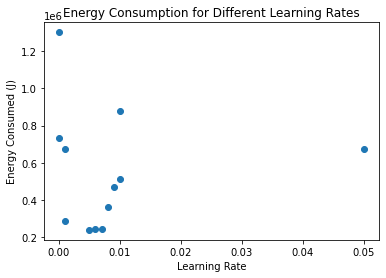

In [14]:
modified_df = history_df[history_df['learning_rate'] < 0.5]
plt.scatter(modified_df['learning_rate'], modified_df['energy'])
plt.title('Energy Consumption for Different Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Energy Consumed (J)')
plt.show()

## Restrict to jobs that reached the target accuracy...

In [15]:
history_reached = history_df.loc[history_df['reached'] == True]
history_reached

,batch_size,learning_rate,power_limit,energy,time,reached
2,1024,0.005,175.0,240343.411707,1745.010062,True
3,1024,0.010,175.0,512864.726165,3675.974090,True
6,1024,0.006,175.0,245090.382049,1682.810655,True
7,1024,0.007,175.0,244904.686396,1681.711068,True
8,1024,0.008,175.0,361245.851221,2453.759384,True
9,1024,0.009,175.0,469427.696310,3171.897549,True
10,128,0.001,175.0,288446.700000,2144.710000,True
11,128,0.010,150.0,877096.590000,7223.740000,True


In [55]:
# Exclude bs=128, lr=0.01
history_reached = history_reached.drop(history_reached[(history_reached.batch_size == 128) & (history_reached.learning_rate == 0.010)].index)

In [56]:
adadelta_hist_reached = adadelta_hist.loc[adadelta_hist['reached'] == True]

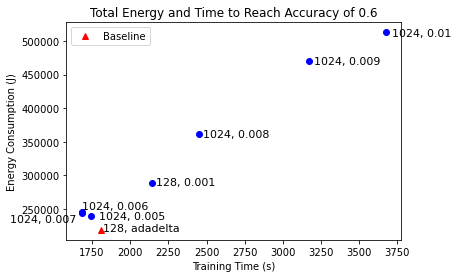

In [82]:
# plt.scatter(history_df['time'], history_df['energy'])
# https://stackoverflow.com/questions/44998205/labeling-points-in-matplotlib-scatterplot 
max_x = 0
for row in history_reached.iterrows():
    time = row[1]['time']
    max_x = max(time, max_x)
    energy = row[1]['energy']
    lr = row[1]['learning_rate']
    bs = row[1]['batch_size']
    plt.plot(time, energy, 'bo')
    label = '128, ' if bs == 128 else '1024, '
    label += str(lr)
    if lr == 0.005:
        plt.text(time * 1.03, energy * 0.98, label, fontsize=11)
    elif lr == 0.007:
        plt.text(time * 0.72, energy * 0.94, label, fontsize=11)
    elif lr == 0.006:
#         plt.plot(time, energy, 'ro')
        plt.text(time * 1.0, energy * 1.02, label, fontsize=11)
    else:
        plt.text(time * 1.01, energy * 0.99, label, fontsize=11)

slope = 0
for row in adadelta_hist_reached.iterrows():
    time = row[1]['time']
    energy = row[1]['energy']
    slope = energy / time
    plt.plot(time, energy, 'r^', label='Baseline')
    plt.text(time * 1.01, energy * 0.99, '128, adadelta', fontsize=11)       

# Plot line through baseline
# x = np.linspace(0, max_x, 100)
# y = slope * x
# plt.plot(x, y, color='gray', label=f'y = {slope:.2f} x')

# https://pythonguides.com/matplotlib-best-fit-line/ 
# reached = pd.concat([history_reached, adadelta_hist_reached])
# theta = np.polyfit(reached['time'], reached['energy'], 1)
# best_fit_line = theta[1] + theta[0] * history_reached['time']

# plt.plot(history_reached['time'], best_fit_line, 'r')

plt.title('Total Energy and Time to Reach Accuracy of 0.6')
plt.xlabel('Training Time (s)')
plt.ylabel('Energy Consumption (J)')
plt.legend()
plt.show()

## batch size 128!

In [17]:
files_128 = ['lr_0.0001_adam_bs128.txt', 'lr_0.001_adam_bs128.txt', 'lr_0.01_adam_bs128.txt', 'adadelta_bs128.txt']

[0.1244, 0.2235, 0.2779, 0.3185, 0.3829, 0.4266, 0.4432, 0.4738, 0.5096, 0.5106, 0.5235, 0.527, 0.5451, 0.5647, 0.5698, 0.585, 0.592, 0.5846, 0.5806, 0.6002]
[92.94, 183.02, 273.62, 363.89, 454.06, 544.2, 634.41, 724.64, 814.76, 904.9, 994.98, 1085.16, 1175.36, 1265.65, 1355.76, 1445.89, 1536.08, 1626.29, 1716.36, 1806.52]
[10802.39, 21738.31, 32720.8, 43685.84, 54647.24, 65603.73, 76569.39, 87533.81, 98487.19, 109441.81, 120390.94, 131357.55, 142315.28, 153281.2, 164235.35, 175189.47, 186152.34, 197109.64, 208065.42, 219024.37]


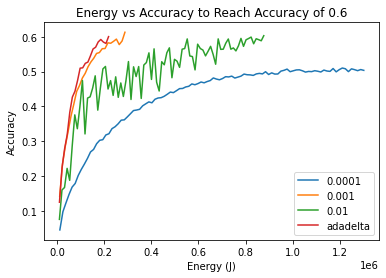

In [18]:
energy_time_128 = []
recorded = set()
energy_consumption = {}
for file in files_128:
    acc = []
    time = []
    energy_cons = []
    with open(file) as f:
        line = f.readline()
        accuracy = 0
        threshold_met = False
        while line:
            if "Validation Epoch:" in line:
                accuracy = float(line[line.index(ACC) + len(ACC): line.index("\n")])
                acc.append(accuracy)
                if accuracy >= THRESHOLD and file not in recorded:
                    energy_time_128.append((energy, time, file))
                    recorded.add(file)
                    break
            elif "Up to epoch" in line:
                if "epoch 0" not in line:
                    t = float(line[line.index(TIME) + len(TIME): line.index(ENERGY)])
                    energy = float(line[line.index(", energy=") + len(", energy="): line.index(", cost=")])
                    time.append(t)
                    energy_cons.append(energy)
#                 if accuracy >= THRESHOLD and file not in recorded:
#                     energy_time_128.append((energy, time, file))
#                     recorded.add(file)
#                     threshold_met = True
            line = f.readline()
    accuracies[file] = acc
    times[file] = time
    energy_consumption[file] = energy_cons
    lr = file.split('_')[1] if 'adam' in file else 'adadelta'
    plt.plot(energy_cons, acc, label=lr)

plt.xlabel("Energy (J)")
plt.ylabel("Accuracy")
plt.title(f"Energy vs Accuracy to Reach Accuracy of {THRESHOLD}")
plt.legend(loc='best')
plt.show()

In [72]:
# The files we want to keep and plot
interesting_files = ["lr_0.001_adam_bs1024.txt", "lr_0.005_adam_bs1024.txt", 'lr_0.006_adam_bs1024.txt',
                     'lr_0.007_adam_bs1024.txt', 'lr_0.008_adam_bs1024.txt', 'lr_0.009_adam_bs1024.txt', 
                     "lr_0.01_adam_bs1024.txt", 'adadelta_bs1024.txt', 'lr_0.001_adam_bs128.txt', 
                     'lr_0.01_adam_bs128.txt', 'adadelta_bs128.txt']

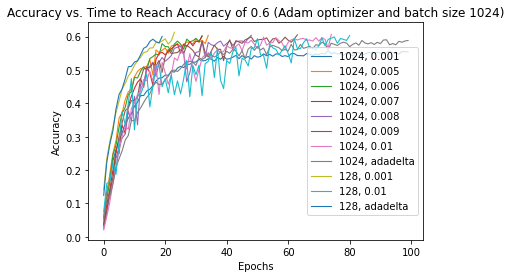

In [79]:
# Accuracy over epochs
for file in interesting_files:
    accuracy = accuracies[file]
    epochs = range(len(accuracy))
    label = '128, ' if '128' in file else '1024, '
    label += file.split('_')[1] if 'adam' in file else 'adadelta'
    plt.plot(epochs, accuracy, label=label, linewidth=1.1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Time to Reach Accuracy of 0.6 (Adam optimizer and batch size 1024)')
plt.legend(loc='right')
plt.show()

In [85]:
def plot_acc_vs_epochs(files, accuracies, title):
    for file in files:
        accuracy = accuracies[file]
        epochs = range(len(accuracy))
        label = '128, ' if '128' in file else '1024, '
        label += file.split('_')[1] if 'adam' in file else 'adadelta'
        plt.plot(epochs, accuracy, label=label, linewidth=1.1)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend(loc='right')
    plt.show()

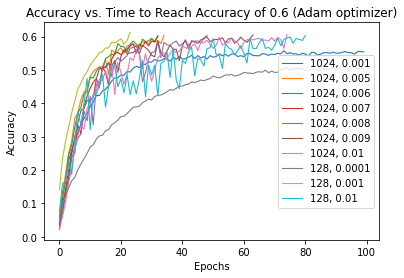

In [86]:
# Just Adam learning rates
just_adam = ["lr_0.001_adam_bs1024.txt", "lr_0.005_adam_bs1024.txt", 'lr_0.006_adam_bs1024.txt', 
             'lr_0.007_adam_bs1024.txt', 'lr_0.008_adam_bs1024.txt', 'lr_0.009_adam_bs1024.txt', 
             "lr_0.01_adam_bs1024.txt", 'lr_0.0001_adam_bs128.txt', 'lr_0.001_adam_bs128.txt', 
             'lr_0.01_adam_bs128.txt']
plot_acc_vs_epochs(just_adam, accuracies, 'Accuracy vs. Time to Reach Accuracy of 0.6 (Adam optimizer)')

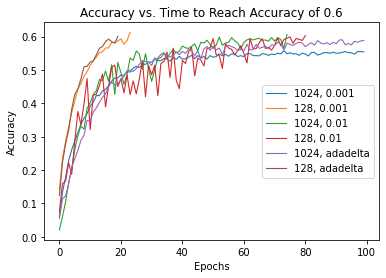

In [87]:
# Comparing adadelta with adam and different batch sizes
adadelta_and_adam = ['lr_0.001_adam_bs1024.txt', 'lr_0.001_adam_bs128.txt', 'lr_0.01_adam_bs1024.txt', 
                     'lr_0.01_adam_bs128.txt', 'adadelta_bs1024.txt', 'adadelta_bs128.txt']
plot_acc_vs_epochs(adadelta_and_adam, accuracies, 'Accuracy vs. Time to Reach Accuracy of 0.6')

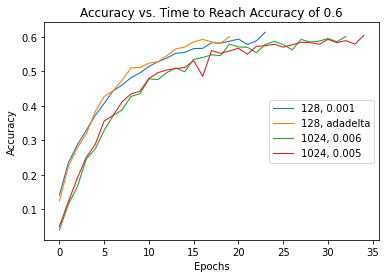

In [89]:
# The best ones
best_ones = ['lr_0.001_adam_bs128.txt', 'adadelta_bs128.txt', 'lr_0.006_adam_bs1024.txt', 'lr_0.005_adam_bs1024.txt']
plot_acc_vs_epochs(best_ones, accuracies, 'Accuracy vs. Time to Reach Accuracy of 0.6')

In [36]:
energy_time_128

[(288446.7,
  [95.48,
   184.47,
   273.34,
   362.32,
   451.17,
   540.39,
   629.49,
   718.57,
   807.57,
   897.97,
   987.53,
   1076.3,
   1165.1,
   1253.86,
   1342.65,
   1431.36,
   1520.1,
   1609.01,
   1697.95,
   1786.97,
   1876.17,
   1965.72,
   2055.15,
   2144.71],
  'lr_0.001_adam_bs128.txt'),
 (877096.59,
  [91.76,
   180.9,
   269.91,
   360.26,
   450.5,
   539.47,
   628.61,
   717.88,
   807.32,
   896.3,
   985.49,
   1074.62,
   1163.43,
   1252.64,
   1341.72,
   1431.2,
   1520.49,
   1610.36,
   1699.83,
   1791.32,
   1880.32,
   1969.43,
   2058.47,
   2148.13,
   2236.96,
   2326.2,
   2415.45,
   2504.69,
   2593.76,
   2683.27,
   2772.58,
   2861.85,
   2951.01,
   3041.22,
   3132.21,
   3221.62,
   3310.71,
   3401.28,
   3491.47,
   3580.67,
   3669.55,
   3758.35,
   3847.32,
   3936.32,
   4025.16,
   4113.97,
   4202.92,
   4292.2,
   4381.1,
   4469.83,
   4558.62,
   4647.68,
   4736.49,
   4825.5,
   4915.03,
   5007.74,
   5096.69,
   5185

In [28]:
accuracies.keys()

dict_keys(['lr_0.0001_adam_bs1024.txt', 'lr_0.001_adam_bs1024.txt', 'lr_0.005_adam_bs1024.txt', 'lr_0.006_adam_bs1024.txt', 'lr_0.007_adam_bs1024.txt', 'lr_0.008_adam_bs1024.txt', 'lr_0.009_adam_bs1024.txt', 'lr_0.01_adam_bs1024.txt', 'adadelta_bs1024.txt', 'lr_0.0001_adam_bs128.txt', 'lr_0.001_adam_bs128.txt', 'lr_0.01_adam_bs128.txt', 'adadelta_bs128.txt'])

ValueError: x and y must be the same size

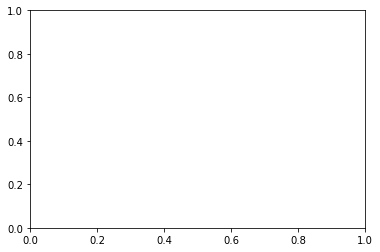

In [31]:
energies = [elem[0] for elem in energy_time_05]
times = [elem[1] for elem in energy_time_05]
names = [elem[2] for elem in energy_time_05]

# print(energy_time_06)
for i in range(len(times)):
    plt.scatter(energies[i], times[i], label=names[i])

plt.xlabel("Energy (J)")
plt.ylabel("Time (s)")
plt.title(f"Energy vs Time to Reach Accuracy of {THRESHOLD}")
plt.legend()
plt.show()

In [30]:
energy_time_05

[(174552.93,
  [50.41,
   98.03,
   149.39,
   232.61,
   279.75,
   326.95,
   374.2,
   421.56,
   468.86,
   516.11,
   563.4,
   610.6,
   657.85,
   705.09,
   752.41,
   799.77,
   847.17,
   894.46,
   941.88,
   989.13,
   1036.54,
   1084.49,
   1132.59,
   1180.17,
   1227.47,
   1274.65,
   1321.92,
   1369.27,
   1416.6,
   1463.92,
   1511.22,
   1558.52,
   1605.82,
   1653.11,
   1700.53,
   1747.89,
   1795.21,
   1842.54,
   1889.81,
   1937.07,
   1984.35,
   2032.11,
   2080.06,
   2127.92,
   2175.27,
   2222.5,
   2269.71,
   2316.96,
   2364.26,
   2411.48,
   2458.77,
   2506.03,
   2553.35,
   2600.7,
   2647.96,
   2695.29,
   2742.6,
   2789.86,
   2837.09,
   2884.45,
   2931.74,
   2978.9,
   3026.15,
   3073.4,
   3120.63,
   3167.89,
   3215.17,
   3262.45,
   3309.73,
   3357.05,
   3404.36,
   3452.34,
   3500.36,
   3548.23,
   3596.66,
   3645.43,
   3693.57,
   3742.38,
   3790.75,
   3839.48,
   3887.91,
   3936.71,
   3984.83,
   4033.61,
   4081.67